In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_prediction_and_error(x, y, model):
    yhat = model.predict(x)
    yRes = y - yhat
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes[0].plot(x, y)
    axes[0].plot(x, yhat)
    axes[1].plot(x, yRes)
    plt.show()
    plt.close()

In [5]:
def gen_test_data():
#     x = np.linspace(-np.pi/2., np.pi/2., 100)
    x = np.linspace(-1, 1, 100)[:,np.newaxis]
    y = np.cos(20*x) + np.sin(10*x)
#     y = np.cos(50*x) + np.sin(5*x)

    noise = np.random.normal(0, 0.1, size=x.shape)

    return x, y + noise

x, y = gen_test_data()


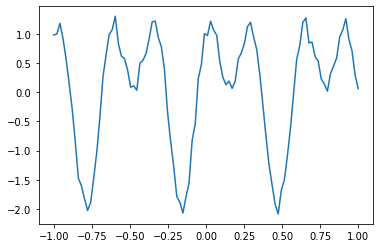

In [6]:
plt.figure()
plt.plot(x, y)
plt.show()
plt.close()

In [7]:
def get_base_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=1000, verbose=verbose)
    
    return history, model

In [8]:
def get_later_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [ ]:
# try that but with freezing layers

In [115]:
def make_autoencoder_regressor(x, y, verbose=True, batch_size=100, epochs=1000):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

## using 2-step method

In [14]:
history, model = get_base_model(x, y, verbose=False)


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
yhat = model.predict(x)

In [19]:
yRes = y-yhat

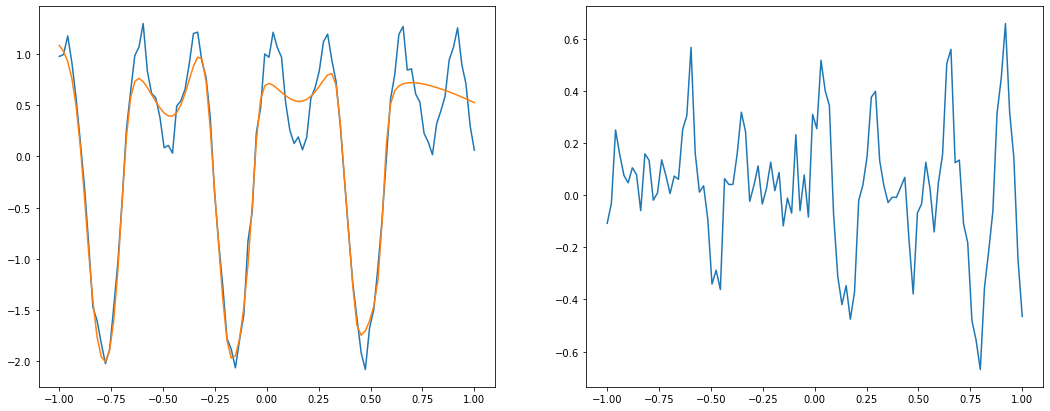

In [20]:
plot_prediction_and_error(x, y, model)

In [21]:
history2, model2 = get_later_model(x, yRes, False)

In [22]:
yhat2 = model2.predict(x)

In [23]:
yRes2 = yRes-yhat2

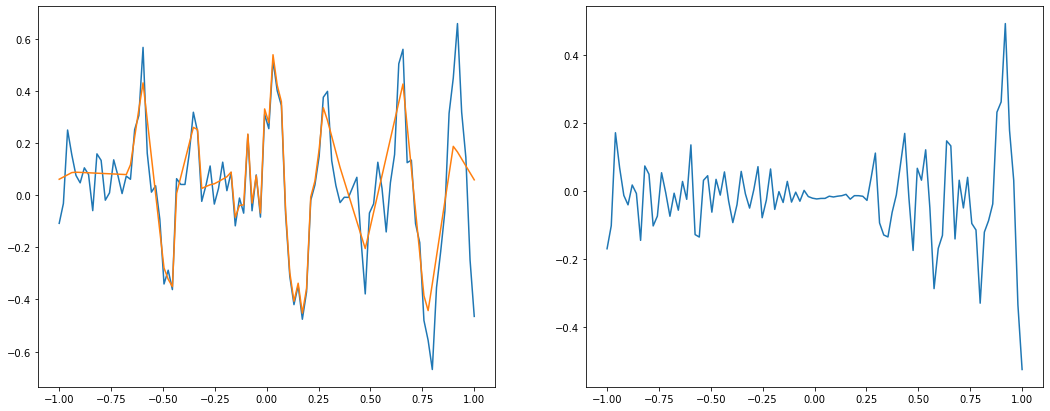

In [24]:
plot_prediction_and_error(x, yRes, model2)

In [32]:
history3, model3 = get_later_model(x, yRes2, False)

In [33]:
yhat3 = model3.predict(x)

In [34]:
yRes3 = yRes2-yhat3

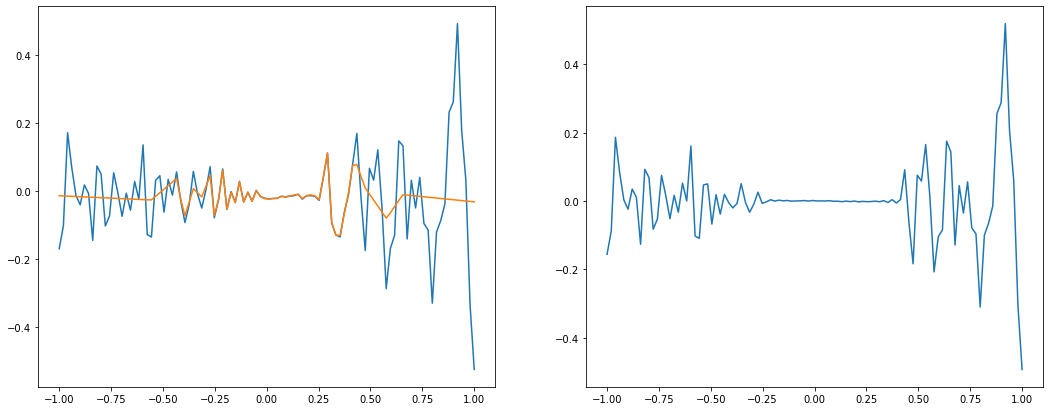

In [35]:
plot_prediction_and_error(x, yRes2, model3)

In [38]:
yhat_multistep = model.predict(x) + model2.predict(x) + model3.predict(x)

## using 1 step method

In [118]:
%%time
history_ae, model_ae = make_autoencoder_regressor(x, y, verbose=False, epochs=10000)

CPU times: user 1min 1s, sys: 14.1 s, total: 1min 15s
Wall time: 28.6 s


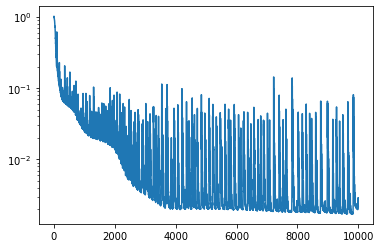

In [119]:
h_ae = history_ae.history['loss']
plt.figure()
plt.plot(range(len(h_ae)), h_ae)
plt.yscale('log')

In [120]:
yhat_ae = model_ae.predict(x)

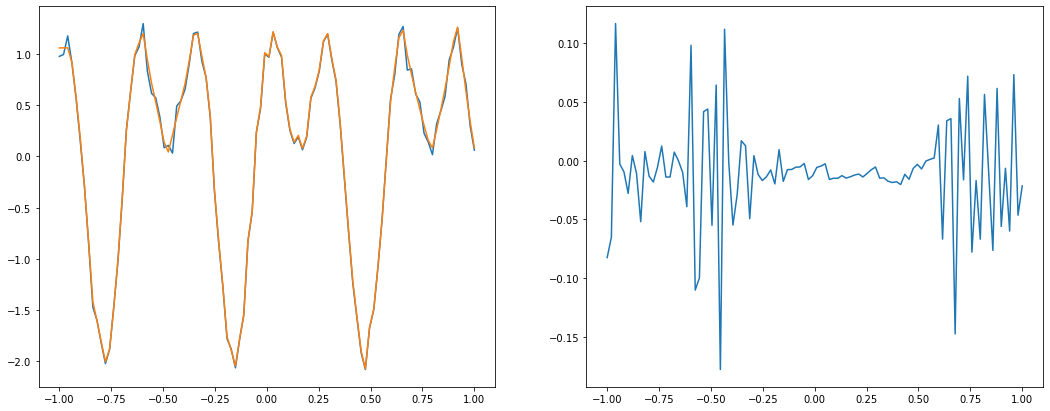

In [121]:
plot_prediction_and_error(x, y, model_ae)

### comparison

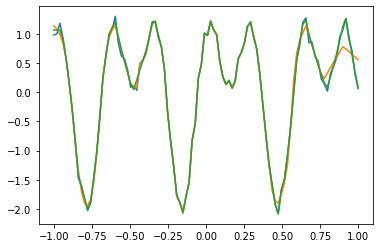

In [122]:
plt.figure()
plt.plot(x, y)
plt.plot(x, yhat_multistep)
plt.plot(x, yhat_ae)

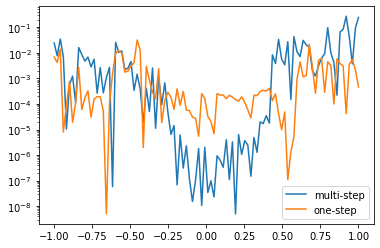

In [123]:
plt.figure()
plt.plot(x, tf.keras.losses.mean_squared_error(y,yhat_multistep), label='multi-step')
plt.plot(x, tf.keras.losses.mean_squared_error(y,yhat_ae), label='one-step')
plt.yscale('log')
plt.legend()